In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, pi, sqrt, arctan
from scipy.integrate import odeint
import scipy.constants as c

### Part 1: Simulating LEO without air drag

In [54]:
G = c.G
M_E = 5.97219e24 #kg
m = 10000 #kg
h = 500000 #m
R_E = 6.371009e6 #m
R = R_E+h

#### A)

In [55]:
v = sqrt(G*M_E/R)
print(f'Minimum orbital velocity: {round(v,6)} m/s')

Minimum orbital velocity: 7616.569532 m/s


#### B)

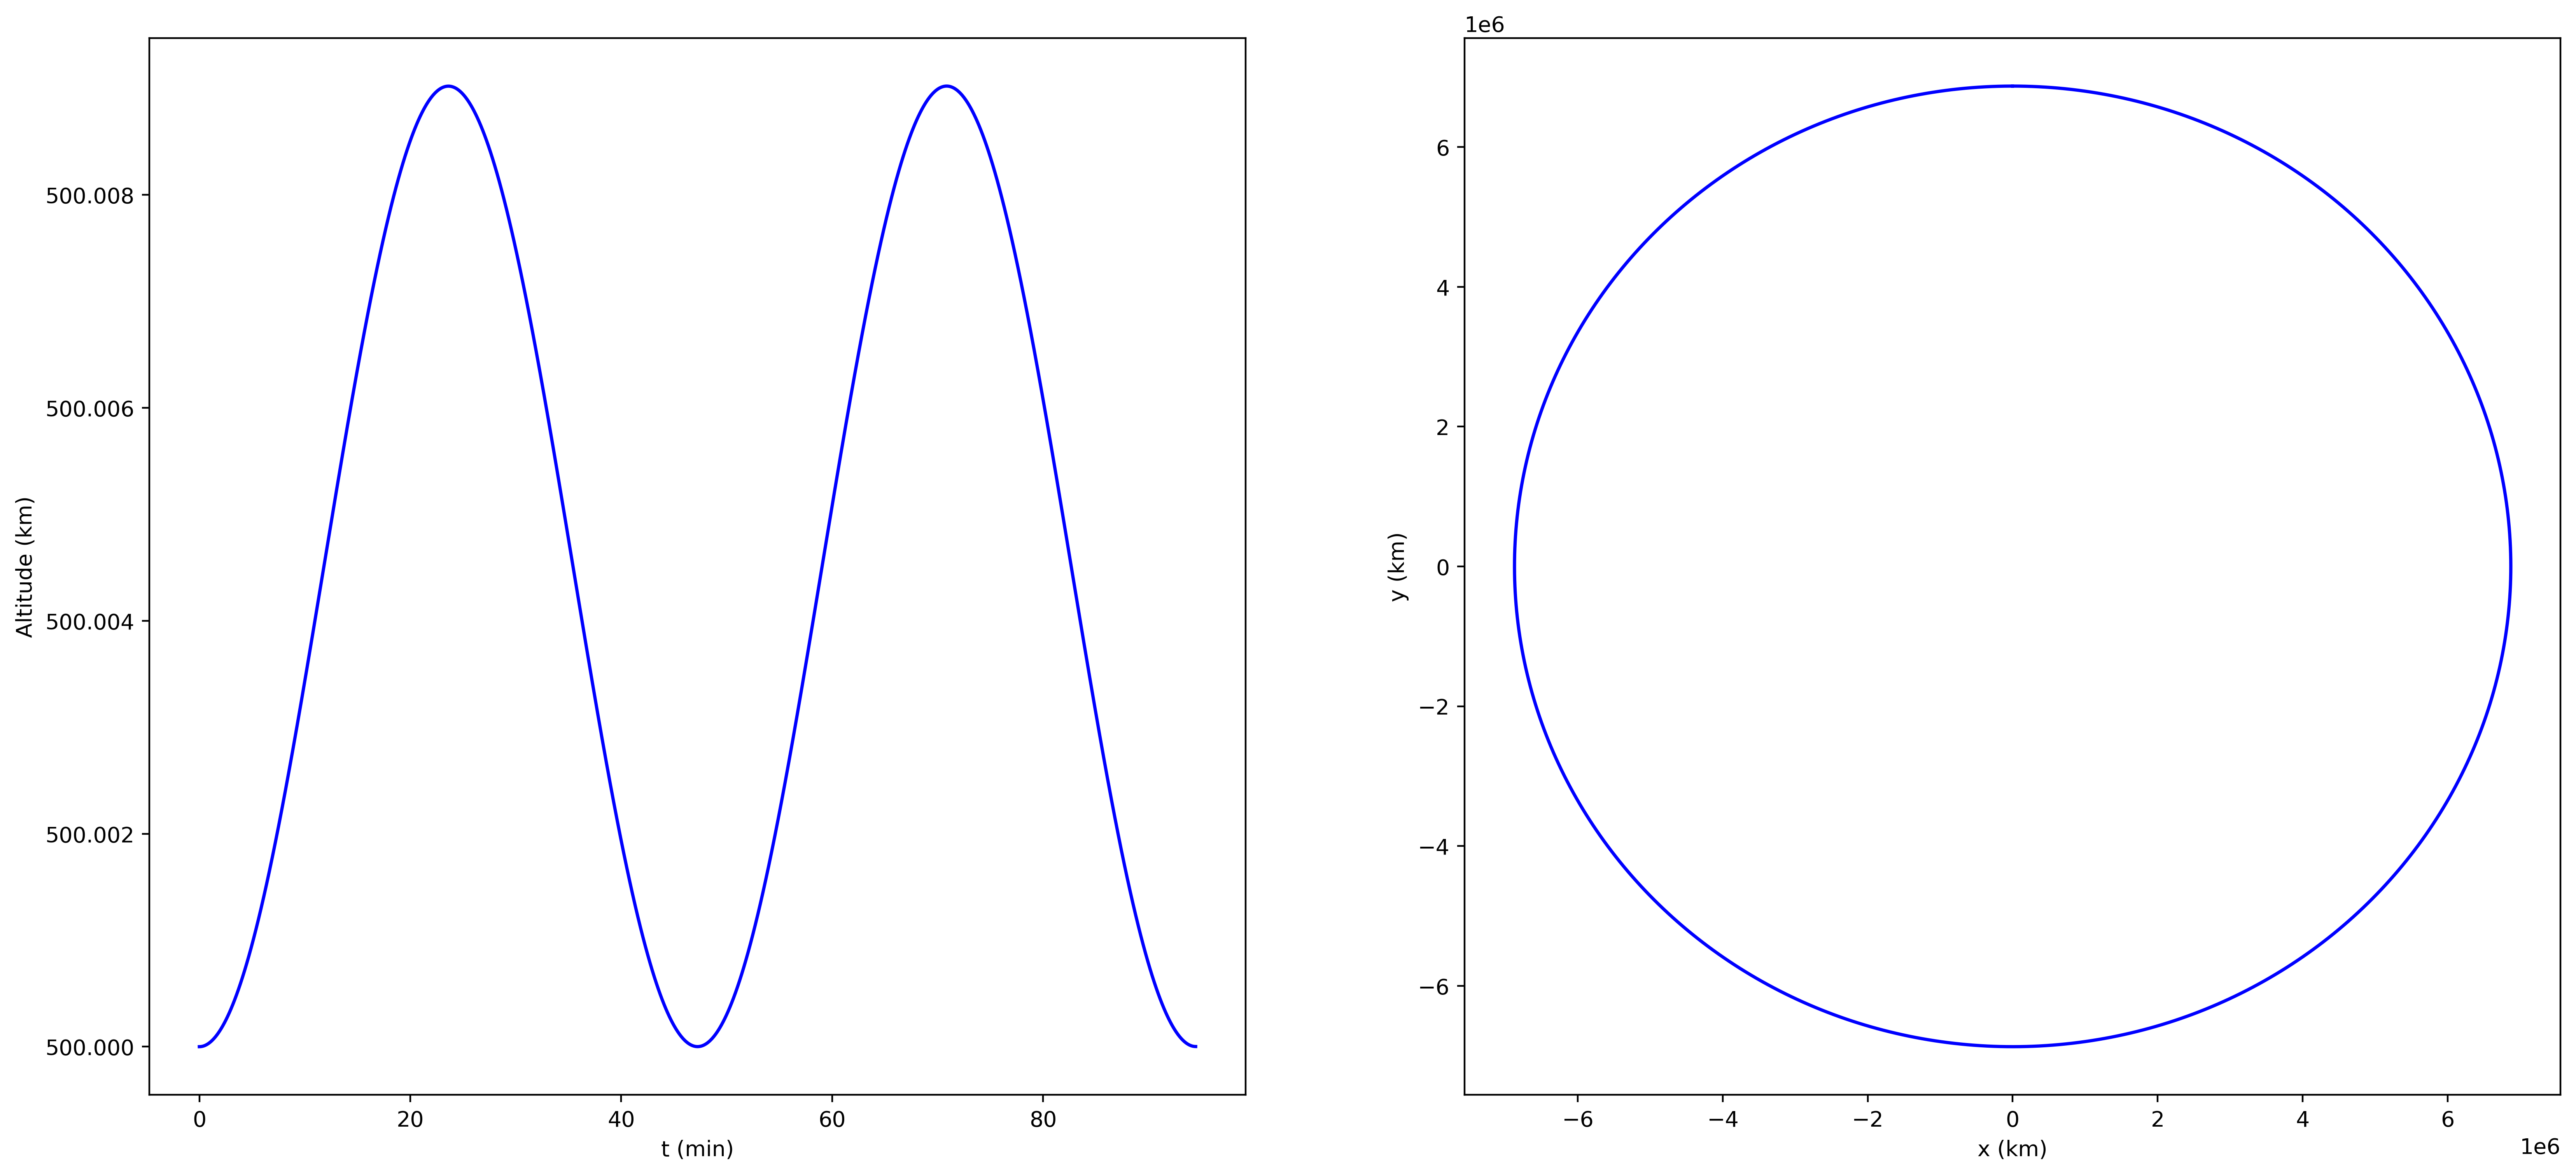

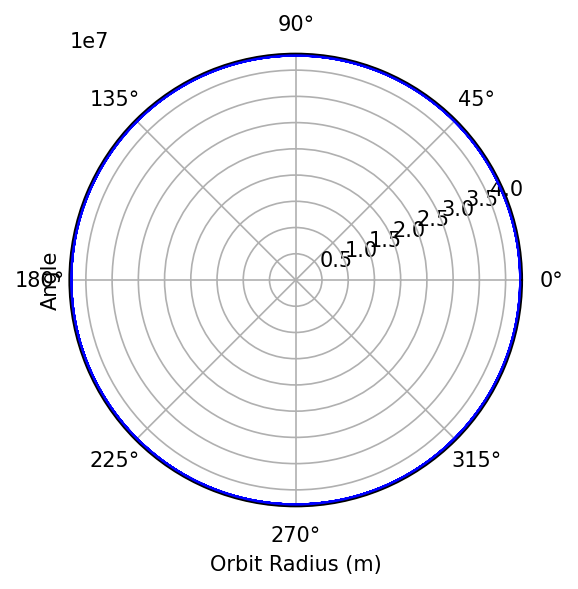

In [79]:
def RK_x(x,v_x,t):
    dxdt = v_x
    dv_xdt = -(G*M_E*x)/R**3
    return dxdt,dv_xdt
    
def RK_y(y,v_y,t):
    dydt = v_y
    dv_ydt = -(G*M_E*y)/R**3
    return dydt,dv_ydt

x0 = 0
y0 = R
v_x0 = v+0.01 #for some reason if I just leave v as it is, the altitude doesnt oscillate, it just plots a diagonal straight line
v_y0 = 0
steps = 10000
tmax = (2*pi*R)/v
tstep = tmax/steps
t = np.linspace(0,tmax,steps)

x = np.zeros([steps])
v_x = np.zeros([steps])
x[0] = x0
v_x[0] = v_x0

y = np.zeros([steps])
v_y = np.zeros([steps])
y[0] = y0
v_y[0] = v_y0

for j in range(1, steps): 
    time = tstep*(j-1)
    
    dxdt, dv_xdt = RK_x(x0, v_x0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    dydt, dv_ydt = RK_y(y0, v_y0, time)
    
    xmid = x0 + (tstep/2) * dxdt
    ymid = y0 + (tstep/2) * dydt
    
    v_xmid = v_x0 + (tstep/2) * dv_xdt
    v_ymid = v_y0 + (tstep/2) * dv_ydt
    
    tmid = time + (tstep/2)
    
    dxdt, dv_xdt = RK_x(xmid, v_xmid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at nev_x time
    dydt, dv_ydt = RK_y(ymid, v_ymid, tmid)
    
    x[j] = x0 + tstep * dxdt
    y[j] = y0 + tstep * dydt
    
    v_x[j] = v_x0 + tstep * dv_xdt
    v_y[j] = v_y0 + tstep * dv_ydt
    
    x0, v_x0 = x[j], v_x[j]
    y0, v_y0 = y[j], v_y[j]

r = sqrt(x**2+y**2)
theta = 2*pi*r
    
fig,ax = plt.subplots(1,2,figsize=(20,9), dpi=400)
ax[0].plot(t/60,(r-R_E)/1000,'b')
ax[0].set_xlabel('t (min)')
ax[0].ticklabel_format(useOffset=False)
ax[0].set_ylabel('Altitude (km)')
ax[1].plot(x,y,'b')
ax[1].set_xlabel('x (km)')
ax[1].set_ylabel('y (km)')

fig2,ax2 = plt.subplots(dpi=150,subplot_kw={'projection': 'polar'})
ax2.plot((r-R_E),theta,linewidth=3,c='b')
ax2.set_xlabel('Orbit Radius (m)')
ax2.set_ylabel('Angle')

plt.show()

### Part 2

#### Part A)

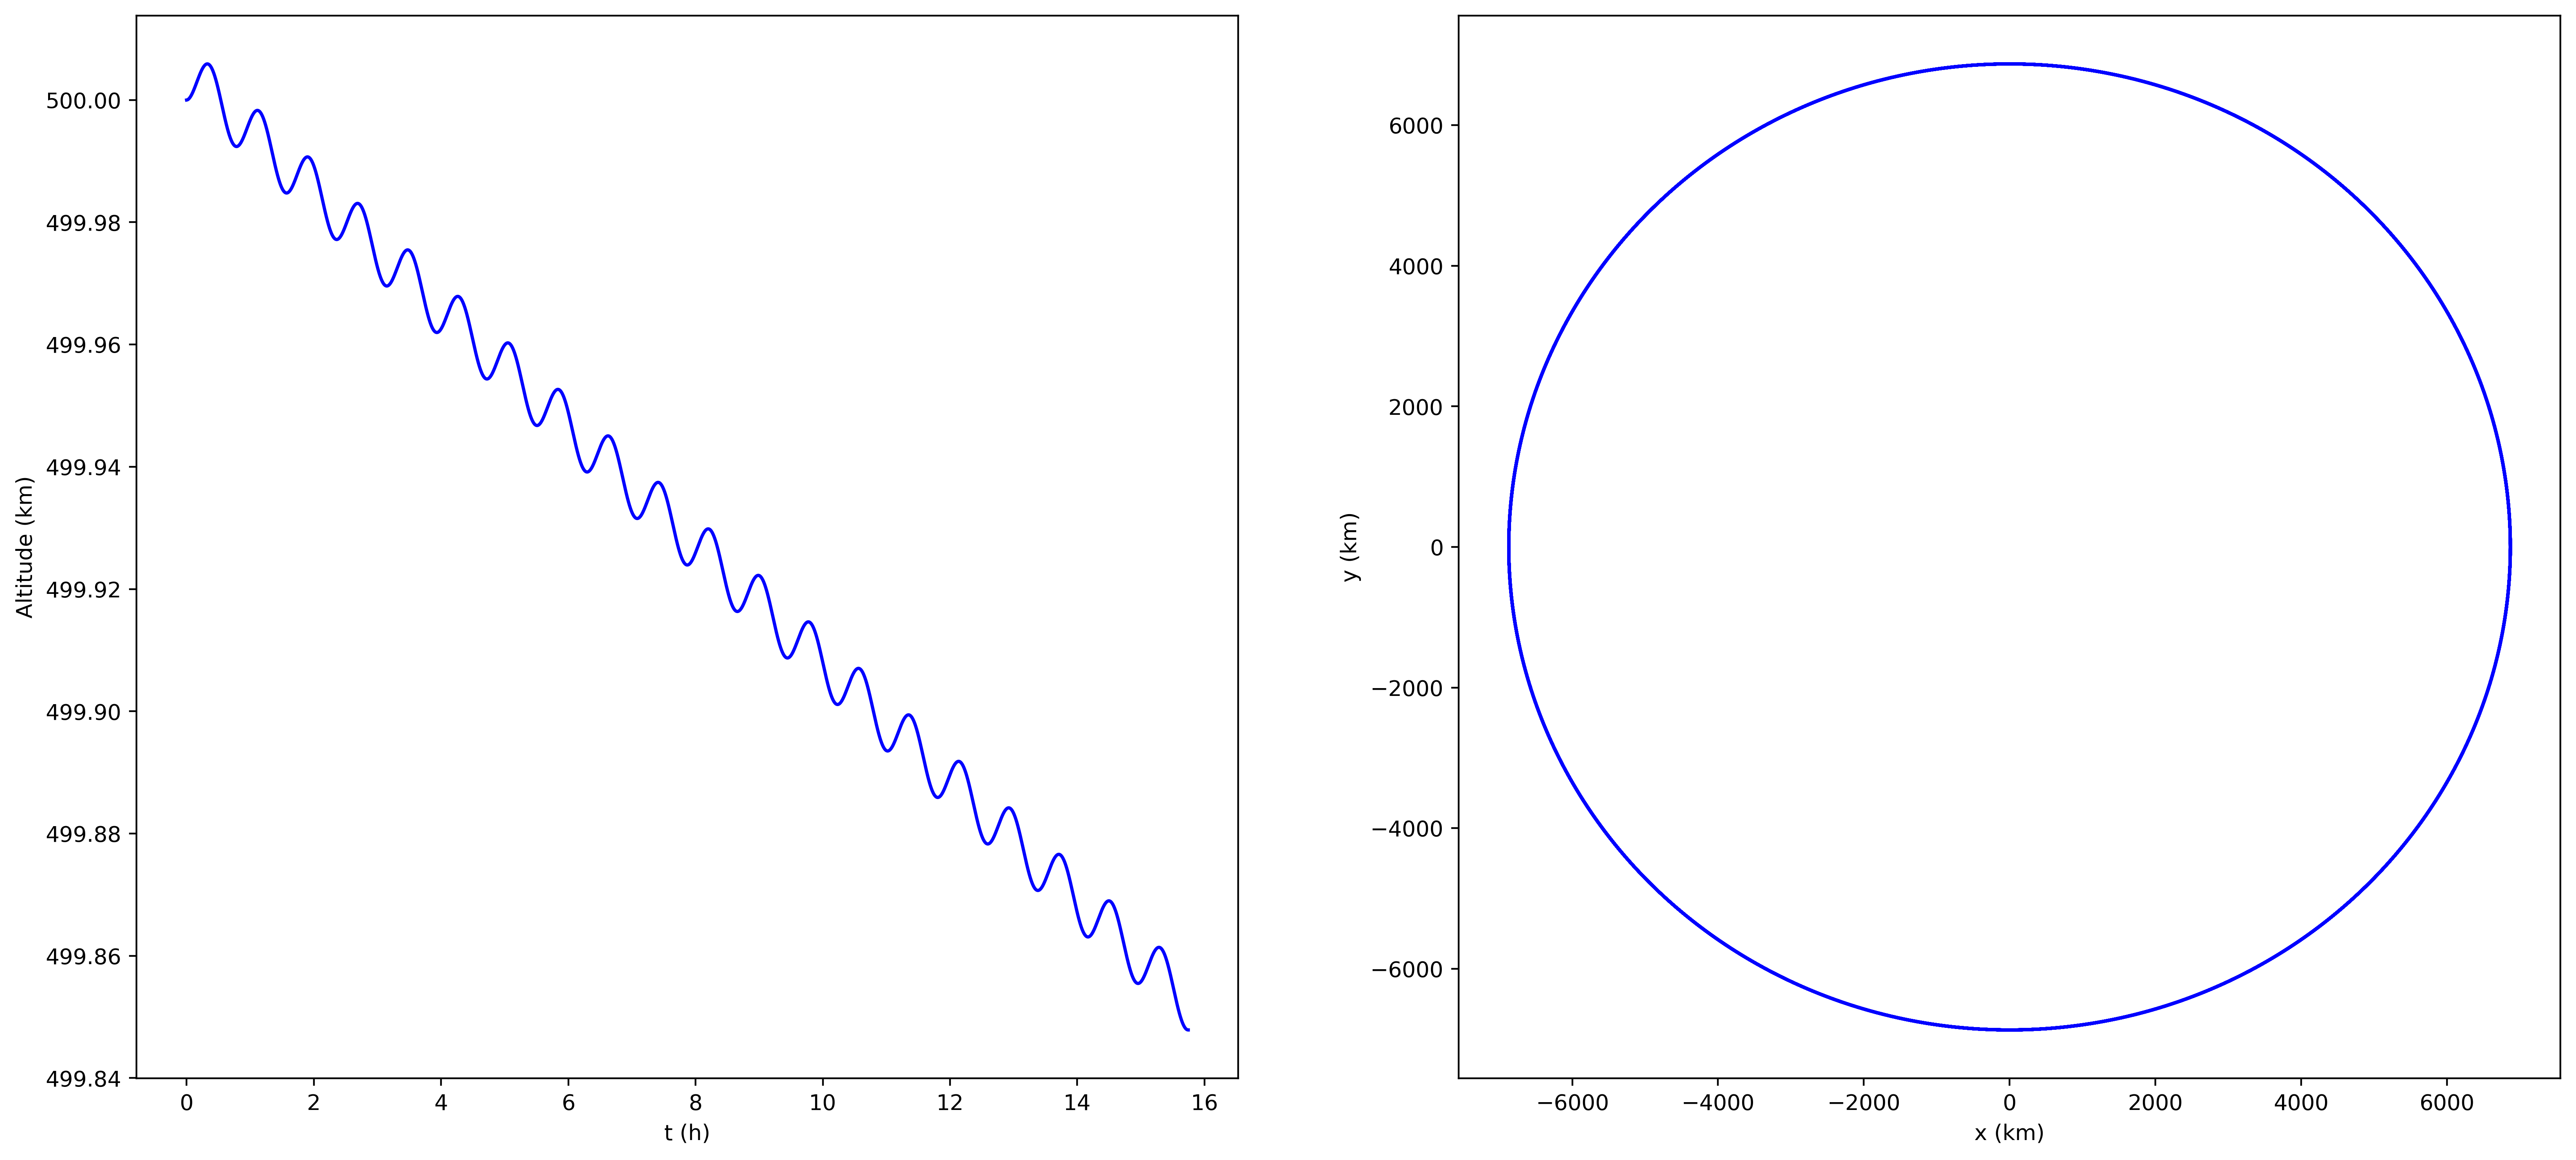

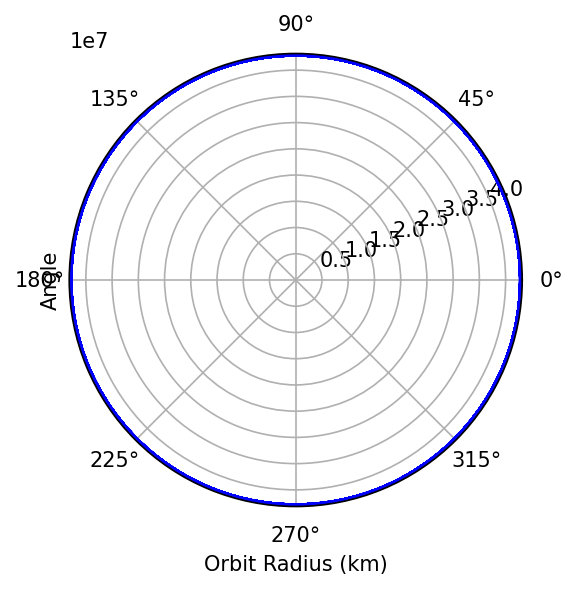

In [80]:
def RK_x(x,v_x,t):
    dxdt = v_x
    dv_xdt = (-(G*M_E*x)/R**3)-(0.5*C_v*rho*A*v_x)
    return dxdt,dv_xdt
    
def RK_y(y,v_y,t):
    dydt = v_y
    dv_ydt = (-(G*M_E*y)/R**3)-(0.5*C_v*rho*A*v_y)
    return dydt,dv_ydt

C_v = 2
rho = 1.7e-11
A = 50
x0 = 0
y0 = R
v_x0 = v+0.01
v_y0 = 0
steps = 10000
tmax = 10*((2*pi*R)/v)
tstep = tmax/steps
t = np.linspace(0,tmax,steps)

x = np.zeros([steps])
v_x = np.zeros([steps])
x[0] = x0
v_x[0] = v_x0

y = np.zeros([steps])
v_y = np.zeros([steps])
y[0] = y0
v_y[0] = v_y0

for j in range(1, steps): 
    time = tstep*(j-1)
    
    dxdt, dv_xdt = RK_x(x0, v_x0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    dydt, dv_ydt = RK_y(y0, v_y0, time)
    
    xmid = x0 + (tstep/2) * dxdt
    ymid = y0 + (tstep/2) * dydt
    
    v_xmid = v_x0 + (tstep/2) * dv_xdt
    v_ymid = v_y0 + (tstep/2) * dv_ydt
    
    tmid = time + (tstep/2)
    
    dxdt, dv_xdt = RK_x(xmid, v_xmid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at nev_x time
    dydt, dv_ydt = RK_y(ymid, v_ymid, tmid)
    
    x[j] = x0 + tstep * dxdt
    y[j] = y0 + tstep * dydt
    
    v_x[j] = v_x0 + tstep * dv_xdt
    v_y[j] = v_y0 + tstep * dv_ydt
    
    x0, v_x0 = x[j], v_x[j]
    y0, v_y0 = y[j], v_y[j]

r = sqrt(x**2+y**2)
theta = 2*pi*r
    
fig,ax = plt.subplots(1,2,figsize=(20,9), dpi=400)
ax[0].plot(t/3600,(r-R_E)/1000,'b')
ax[0].set_xlabel('t (h)')
ax[0].set_ylabel('Altitude (km)')
ax[0].ticklabel_format(useOffset=False)
ax[1].plot(x/1000,y/1000,'b')
ax[1].set_xlabel('x (km)')
ax[1].set_ylabel('y (km)')

fig2,ax2 = plt.subplots(dpi=150, subplot_kw={'projection': 'polar'})
ax2.plot((r-R_E),theta,linewidth=3,c='b')
ax2.set_xlabel('Orbit Radius (km)')
ax2.set_ylabel('Angle')

plt.show()

#### B)

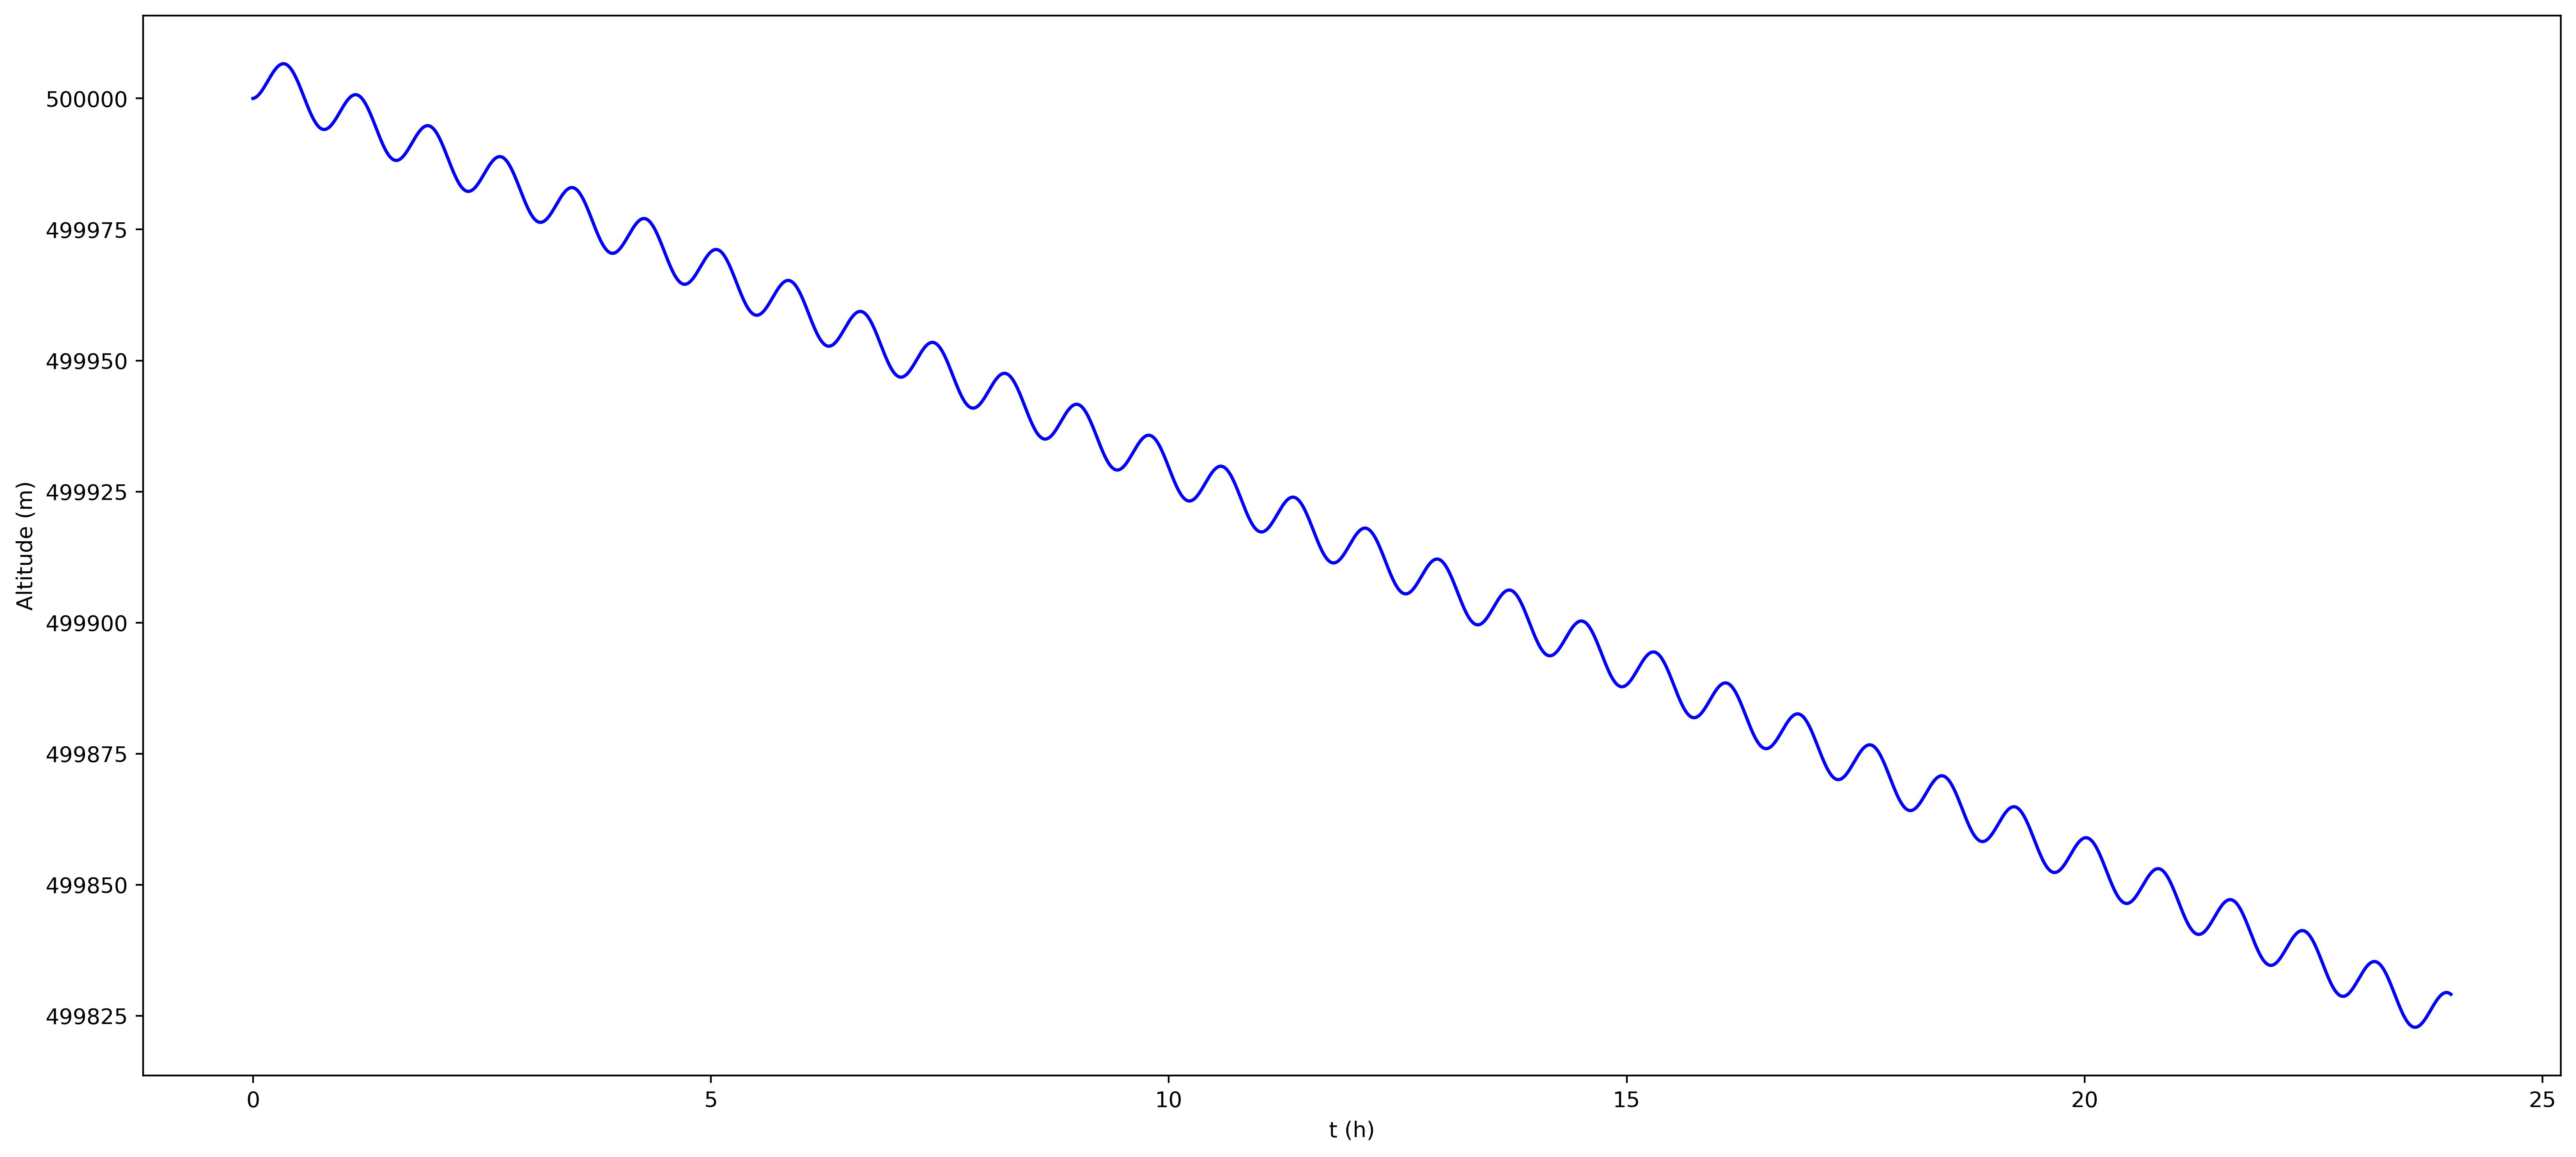

Loses ~275m of altitude in a day


In [97]:
def RK_x(x,v_x,t):
    dxdt = v_x
    dv_xdt = (-(G*M_E*x)/R**3)-(0.5*C_v*rho*A*v_x)
    return dxdt,dv_xdt
    
def RK_y(y,v_y,t):
    dydt = v_y
    dv_ydt = (-(G*M_E*y)/R**3)-(0.5*C_v*rho*A*v_y)
    return dydt,dv_ydt

C_v = 2
rho = 1.7e-11
A = 50
x0 = 0
y0 = R
v_x0 = v+0.01
v_y0 = 0
steps = 10000
tmax = 86400 #day in seconds
tstep = tmax/steps
t = np.linspace(0,tmax,steps)

x = np.zeros([steps])
v_x = np.zeros([steps])
x[0] = x0
v_x[0] = v_x0

y = np.zeros([steps])
v_y = np.zeros([steps])
y[0] = y0
v_y[0] = v_y0

for j in range(1, steps): 
    time = tstep*(j-1)
    
    dxdt, dv_xdt = RK_x(x0, v_x0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    dydt, dv_ydt = RK_y(y0, v_y0, time)
    
    xmid = x0 + (tstep/2) * dxdt
    ymid = y0 + (tstep/2) * dydt
    
    v_xmid = v_x0 + (tstep/2) * dv_xdt
    v_ymid = v_y0 + (tstep/2) * dv_ydt
    
    tmid = time + (tstep/2)
    
    dxdt, dv_xdt = RK_x(xmid, v_xmid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at nev_x time
    dydt, dv_ydt = RK_y(ymid, v_ymid, tmid)
    
    x[j] = x0 + tstep * dxdt
    y[j] = y0 + tstep * dydt
    
    v_x[j] = v_x0 + tstep * dv_xdt
    v_y[j] = v_y0 + tstep * dv_ydt
    
    x0, v_x0 = x[j], v_x[j]
    y0, v_y0 = y[j], v_y[j]

r = sqrt(x**2+y**2)
theta = 2*pi*r
    
fig,ax = plt.subplots(figsize=(20,9), dpi=400)
ax.plot(t/3600,r-R_E,'b')
ax.set_xlabel('t (h)')
ax.set_ylabel('Altitude (m)')

plt.show()

print('Loses ~275m of altitude in a day')

#### C)

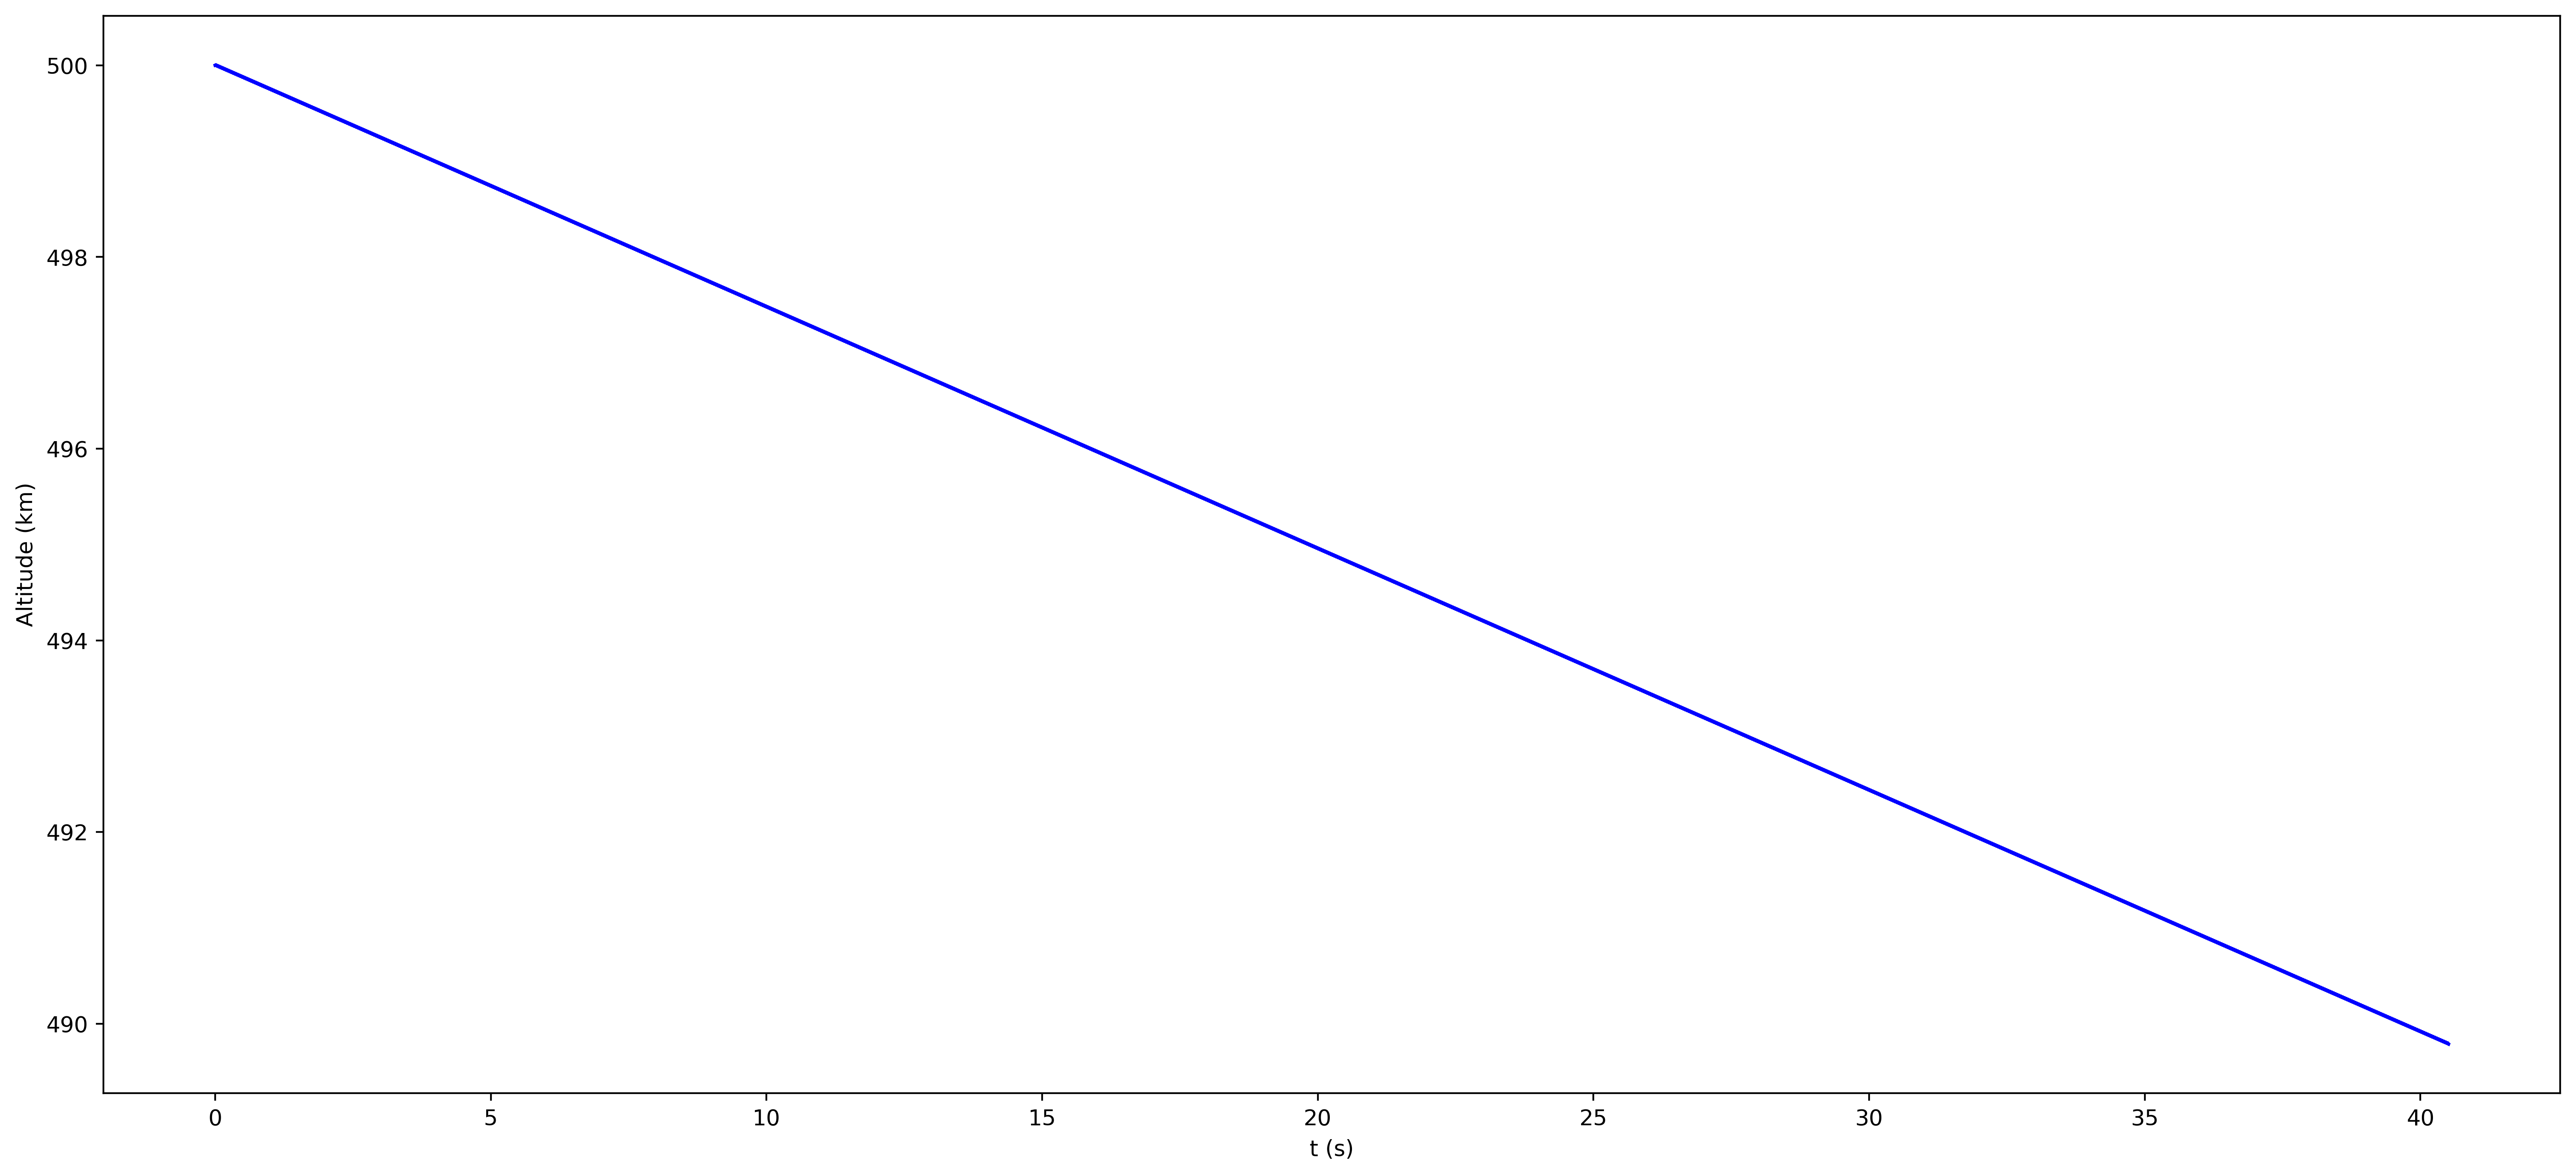

Takes ~40 days


In [111]:
def RK_x(x,v_x,t):
    dxdt = v_x
    dv_xdt = (-(G*M_E*x)/R**3)-(0.5*C_v*rho*A*v_x)
    return dxdt,dv_xdt
    
def RK_y(y,v_y,t):
    dydt = v_y
    dv_ydt = (-(G*M_E*y)/R**3)-(0.5*C_v*rho*A*v_y)
    return dydt,dv_ydt

C_v = 2
rho = 1.7e-11
A = 50
x0 = 0
y0 = R
v_x0 = v+0.01
v_y0 = 0
steps = 6000000
tmax = 3500000
tstep = tmax/steps
t = np.linspace(0,tmax,steps)

x = np.zeros([steps])
v_x = np.zeros([steps])
x[0] = x0
v_x[0] = v_x0

y = np.zeros([steps])
v_y = np.zeros([steps])
y[0] = y0
v_y[0] = v_y0

for j in range(1, steps): 
    time = tstep*(j-1)
    
    dxdt, dv_xdt = RK_x(x0, v_x0, time) # calculate derivative function at initial step # evaluate x, y and t at midpoint using Euler starting from initial step 
    dydt, dv_ydt = RK_y(y0, v_y0, time)
    
    xmid = x0 + (tstep/2) * dxdt
    ymid = y0 + (tstep/2) * dydt
    
    v_xmid = v_x0 + (tstep/2) * dv_xdt
    v_ymid = v_y0 + (tstep/2) * dv_ydt
    
    tmid = time + (tstep/2)
    
    dxdt, dv_xdt = RK_x(xmid, v_xmid, tmid) # calculate derivative function at midpoint valu # Calculate x and y values at nev_x time
    dydt, dv_ydt = RK_y(ymid, v_ymid, tmid)
    
    x[j] = x0 + tstep * dxdt
    y[j] = y0 + tstep * dydt
    
    v_x[j] = v_x0 + tstep * dv_xdt
    v_y[j] = v_y0 + tstep * dv_ydt
    
    x0, v_x0 = x[j], v_x[j]
    y0, v_y0 = y[j], v_y[j]

r = sqrt(x**2+y**2)
theta = 2*pi*r
    
fig,ax = plt.subplots(figsize=(20,9), dpi=400)
ax.plot(t/86400,(r-R_E)/1000,'b')
ax.set_xlabel('t (s)')
ax.set_ylabel('Altitude (km)')

plt.show()

print('Takes ~40 days')

#### D)

In [110]:
F_drag = -(0.5*C_v*rho*A*v)
F_thrust = -F_drag
Energy = 2*pi*h*F_thrust
print(f'Thrust Force: {F_thrust} N','\n',f'Energy: {Energy} J')

Thrust Force: 6.474084101919819e-06 N 
 Energy: 20.338935053313776 J
